<a href="https://colab.research.google.com/github/SinchanaKS/CodSoft-task2/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data = pd.read_csv("/content/fraudTrain.csv")


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27259 entries, 0 to 27258
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27259 non-null  int64  
 1   trans_date_trans_time  27259 non-null  object 
 2   cc_num                 27259 non-null  int64  
 3   merchant               27259 non-null  object 
 4   category               27259 non-null  object 
 5   amt                    27259 non-null  float64
 6   first                  27259 non-null  object 
 7   last                   27259 non-null  object 
 8   gender                 27259 non-null  object 
 9   street                 27259 non-null  object 
 10  city                   27258 non-null  object 
 11  state                  27258 non-null  object 
 12  zip                    27258 non-null  float64
 13  lat                    27258 non-null  float64
 14  long                   27258 non-null  float64
 15  ci

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,27259.00000,2.725900e+04,27259.000000,27258.000000,27258.000000,27258.000000,2.725800e+04,2.725800e+04,27258.000000,27258.000000,27258.000000
mean,13629.00000,4.203488e+17,71.834406,48732.303581,38.525900,-90.224295,9.005962e+04,1.326075e+09,38.525442,-90.225811,0.009355
std,7869.13983,1.313623e+18,151.848187,26978.693903,5.097014,13.927149,2.988129e+05,3.959763e+05,5.124933,13.946210,0.096270
min,0.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,6814.50000,1.800462e+14,9.680000,25526.000000,34.690200,-96.809400,7.540000e+02,1.325766e+09,34.785420,-96.950790,0.000000
50%,13629.00000,3.519233e+15,47.890000,48088.000000,39.339100,-87.476900,2.501000e+03,1.326043e+09,39.334418,-87.430602,0.000000
75%,20443.50000,4.651007e+15,83.600000,72042.000000,41.846700,-80.124800,2.112500e+04,1.326453e+09,41.899086,-80.148617,0.000000
max,27258.00000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326730e+09,66.659242,-66.967742,1.000000


In [ ]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27254,27254,2019-01-16 16:11:37,4878364946692291,fraud_Bauch-Raynor,grocery_pos,311.01,Tina,Alvarez,F,1976 Tyler Underpass,...,42.4483,-95.1726,885.0,"Pilot, airline",1949-08-14,95bae2e173f59aa359e59d50b85c81c6,1.326730e+09,42.088057,-95.207560,1.0
27255,27255,2019-01-16 16:11:38,180084695172649,fraud_Botsford and Sons,home,75.14,Holly,Mann,F,7644 Joseph Fields,...,39.3036,-89.2853,3458.0,Building surveyor,1985-12-08,31ff7fb365a6425ee51c35eb39e877d5,1.326730e+09,38.993834,-89.709933,0.0
27256,27256,2019-01-16 16:11:59,38057513087029,fraud_Kozey-Kuhlman,personal_care,21.29,Marissa,Clark,F,2677 Byrd Village Suite 035,...,37.3304,-121.7913,973849.0,Geoscientist,1997-01-18,bf495ee334f318f18552e16a9c750ae6,1.326730e+09,37.871844,-122.029575,0.0
27257,27257,2019-01-16 16:12:26,180084576295055,fraud_Windler LLC,kids_pets,40.45,David,Kirby,M,133 Alyssa Plains,...,28.7724,-96.4793,911.0,Archaeologist,1970-01-18,8c7acaafddc3b450418ecaa467f30cc5,1.326730e+09,28.964929,-97.250660,0.0


In [ ]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27254,fraud_Bauch-Raynor,grocery_pos,311.01,F,42.4483,-95.1726,885.0,"Pilot, airline",1.326730e+09,42.088057,-95.207560,1.0
27255,fraud_Botsford and Sons,home,75.14,F,39.3036,-89.2853,3458.0,Building surveyor,1.326730e+09,38.993834,-89.709933,0.0
27256,fraud_Kozey-Kuhlman,personal_care,21.29,F,37.3304,-121.7913,973849.0,Geoscientist,1.326730e+09,37.871844,-122.029575,0.0
27257,fraud_Windler LLC,kids_pets,40.45,M,28.7724,-96.4793,911.0,Archaeologist,1.326730e+09,28.964929,-97.250660,0.0


In [ ]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [ ]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495.0,356,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149.0,411,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154.0,294,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939.0,315,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99.0,110,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27254,29,4,311.01,0,42.4483,-95.1726,885.0,327,1.326730e+09,42.088057,-95.207560,1.0
27255,69,6,75.14,0,39.3036,-89.2853,3458.0,51,1.326730e+09,38.993834,-89.709933,0.0
27256,338,10,21.29,0,37.3304,-121.7913,973849.0,206,1.326730e+09,37.871844,-122.029575,0.0
27257,671,7,40.45,1,28.7724,-96.4793,911.0,28,1.326730e+09,28.964929,-97.250660,0.0


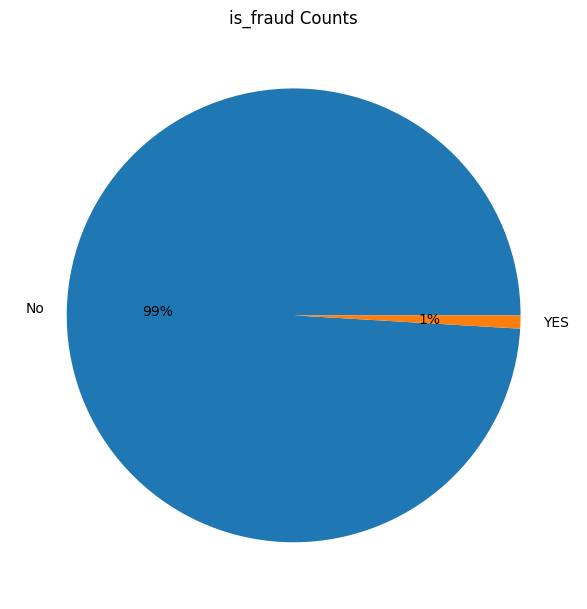

In [ ]:
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495.0,356,1.325376e+09,36.011293,-82.048315,0.0
1,241,4,107.23,0,48.8878,-118.2105,149.0,411,1.325376e+09,49.159047,-118.186462,0.0
2,390,0,220.11,1,42.1808,-112.2620,4154.0,294,1.325376e+09,43.150704,-112.154481,0.0
3,360,2,45.00,1,46.2306,-112.1138,1939.0,315,1.325376e+09,47.034331,-112.561071,0.0
4,297,9,41.96,1,38.4207,-79.4629,99.0,110,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27254,29,4,311.01,0,42.4483,-95.1726,885.0,327,1.326730e+09,42.088057,-95.207560,1.0
27255,69,6,75.14,0,39.3036,-89.2853,3458.0,51,1.326730e+09,38.993834,-89.709933,0.0
27256,338,10,21.29,0,37.3304,-121.7913,973849.0,206,1.326730e+09,37.871844,-122.029575,0.0
27257,671,7,40.45,1,28.7724,-96.4793,911.0,28,1.326730e+09,28.964929,-97.250660,0.0


In [ ]:
model = SVC()
model.fit(X, Y)

SVC()

In [ ]:
Y = Y.dropna()

In [ ]:
# Drop rows with missing values
X = X.dropna()

# Fill missing values with the mean
X = X.fillna(X.mean())

In [ ]:
test_data = pd.read_csv("/content/fraudTrain.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410936,410936,2019-07-05 12:08:26,30238755902988,fraud_Spencer PLC,entertainment,71.20,Danielle,Yu,F,5395 Colon Burgs Suite 037,...,30.5920,-97.2893,1766,Press sub,1976-01-02,195a5bd3a56ba02979ce409304d5fa6a,1.341490e+09,30.298650,-97.320896,0.0
410937,410937,2019-07-05 12:09:36,213191402330021,"fraud_Kuhic, Bins and Pfeffer",shopping_net,4.77,Thomas,Sullivan,M,464 Newman Crossroad,...,42.9676,-88.0434,817312,"Accountant, chartered public finance",2004-03-18,47a8596a7ca1178c3e84ac1fa836b3e4,1.341490e+09,43.469826,-87.109656,0.0
410938,410938,2019-07-05 12:10:11,503874407318,"fraud_Mosciski, Ziemann and Farrell",shopping_net,7.04,Andrew,Mcgee,M,4130 Tiffany Glen Apt. 562,...,29.5894,-98.5201,1595797,Exhibition designer,1975-12-28,94aee92294b203cb24a3d2f9e140ef7e,1.341490e+09,29.586306,-98.748929,0.0
410939,410939,2019-07-05 12:11:35,375082648741747,"fraud_Swaniawski, Lowe and Robel",shopping_pos,9.36,Shannon,Bell,F,2918 David Spurs,...,47.0999,-96.7270,346,"Research officer, trade union",1976-12-14,71706821cb280c1fb6ecfc83a45cc9ae,1.341490e+09,46.694460,-96.847278,0.0


In [ ]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [ ]:
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,360,1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,241,4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,416,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,390,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,298,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,319,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,297,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,113,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410936,410936,2019-07-05 12:08:26,30238755902988,586,0,71.20,Danielle,Yu,0,5395 Colon Burgs Suite 037,...,30.5920,-97.2893,1766,339,1976-01-02,195a5bd3a56ba02979ce409304d5fa6a,1.341490e+09,30.298650,-97.320896,0.0
410937,410937,2019-07-05 12:09:36,213191402330021,347,11,4.77,Thomas,Sullivan,1,464 Newman Crossroad,...,42.9676,-88.0434,817312,2,2004-03-18,47a8596a7ca1178c3e84ac1fa836b3e4,1.341490e+09,43.469826,-87.109656,0.0
410938,410938,2019-07-05 12:10:11,503874407318,443,11,7.04,Andrew,Mcgee,1,4130 Tiffany Glen Apt. 562,...,29.5894,-98.5201,1595797,183,1975-12-28,94aee92294b203cb24a3d2f9e140ef7e,1.341490e+09,29.586306,-98.748929,0.0
410939,410939,2019-07-05 12:11:35,375082648741747,610,12,9.36,Shannon,Bell,0,2918 David Spurs,...,47.0999,-96.7270,346,381,1976-12-14,71706821cb280c1fb6ecfc83a45cc9ae,1.341490e+09,46.694460,-96.847278,0.0


In [ ]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

In [ ]:
from sklearn.impute import SimpleImputer
X_test_adjusted = X_test[X.columns]
imputer = SimpleImputer(strategy='mean')
X_test_adjusted_imputed = imputer.fit_transform(X_test_adjusted)
X_test_adjusted.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_adjusted.fillna(0, inplace=True)

y_pred = model.predict(X_test_adjusted)

y_pred

<ipython-input-63-25f879e46d1b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_adjusted.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-63-25f879e46d1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_adjusted.fillna(0, inplace=True)


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
test_data['is_fraud_imputed'] = imputer.fit_transform(test_data['is_fraud'].values.reshape(-1, 1))
test_data_cleaned = test_data.dropna(subset=['is_fraud'])
y_pred = np.nan_to_num(y_pred, nan=0, posinf=1e10, neginf=-1e10)

y_pred_adjusted = y_pred[test_data_cleaned.index]
accuracy = accuracy_score(test_data_cleaned['is_fraud'], y_pred_adjusted)
accuracy

0.993458899109359